In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from pandas import Series
import statsmodels.api as sm

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
import altair as alt

In [3]:
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [4]:
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)

In [5]:
stock = pd.read_csv("C:/Users/mandar/Downloads/New folder/BAJAJ-AUTO.csv")

In [6]:
stock.head()

Date      Symbol Series  Prev Close    Open   High     Low    Last  \
0  2008-05-26  BAJAJ-AUTO     EQ     2101.05  898.00  898.0  551.35  600.25   
1  2008-05-27  BAJAJ-AUTO     EQ      604.75  624.70  639.0  580.30  595.50   
2  2008-05-28  BAJAJ-AUTO     EQ      593.15  561.65  621.9  561.65  605.10   
3  2008-05-29  BAJAJ-AUTO     EQ      608.15  619.40  619.4  576.00  600.00   
4  2008-05-30  BAJAJ-AUTO     EQ      599.45  605.40  607.0  538.00  576.25   

    Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  604.75  624.61  3972485  2.481245e+14     NaN             1202933   
1  593.15  606.43  1751063  1.061901e+14     NaN              369389   
2  608.15  608.75  1652355  1.005877e+14     NaN              898602   
3  599.45  600.98   669269  4.022165e+13     NaN              449951   
4  571.70  565.55  1262117  7.137937e+13     NaN              936432   

   %Deliverble  
0       0.3028  
1       0.2110  
2       0.5438  
3       0.6723  
4       0.7420

In [7]:
stock.tail()

Date      Symbol Series  Prev Close     Open    High      Low  \
3054  2020-09-24  BAJAJ-AUTO     EQ     2986.20  2964.90  3001.9  2912.80   
3055  2020-09-25  BAJAJ-AUTO     EQ     2931.85  2954.95  2998.5  2926.05   
3056  2020-09-28  BAJAJ-AUTO     EQ     2957.40  2976.90  3022.3  2952.85   
3057  2020-09-29  BAJAJ-AUTO     EQ     2966.35  2992.70  3011.0  2890.00   
3058  2020-09-30  BAJAJ-AUTO     EQ     2897.50  2897.55  2939.0  2870.00   

        Last    Close     VWAP   Volume      Turnover   Trades  \
3054  2922.0  2931.85  2942.38   736921  2.168302e+14  36345.0   
3055  2961.0  2957.40  2953.40   559314  1.651877e+14  28586.0   
3056  2964.0  2966.35  2983.44   902239  2.691778e+14  36617.0   
3057  2901.0  2897.50  2937.60  1189292  3.493661e+14  60885.0   
3058  2878.0  2881.10  2901.78  1095715  3.179523e+14  54982.0   

      Deliverable Volume  %Deliverble  
3054              252069       0.3421  
3055              142747       0.2552  
3056              370662       0.4108  
3057              465301       0.3912  
3058              316314       0.2887

In [8]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3059 non-null   object 
 1   Symbol              3059 non-null   object 
 2   Series              3059 non-null   object 
 3   Prev Close          3059 non-null   float64
 4   Open                3059 non-null   float64
 5   High                3059 non-null   float64
 6   Low                 3059 non-null   float64
 7   Last                3059 non-null   float64
 8   Close               3059 non-null   float64
 9   VWAP                3059 non-null   float64
 10  Volume              3059 non-null   int64  
 11  Turnover            3059 non-null   float64
 12  Trades              2313 non-null   float64
 13  Deliverable Volume  3059 non-null   int64  
 14  %Deliverble         3059 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 358.6

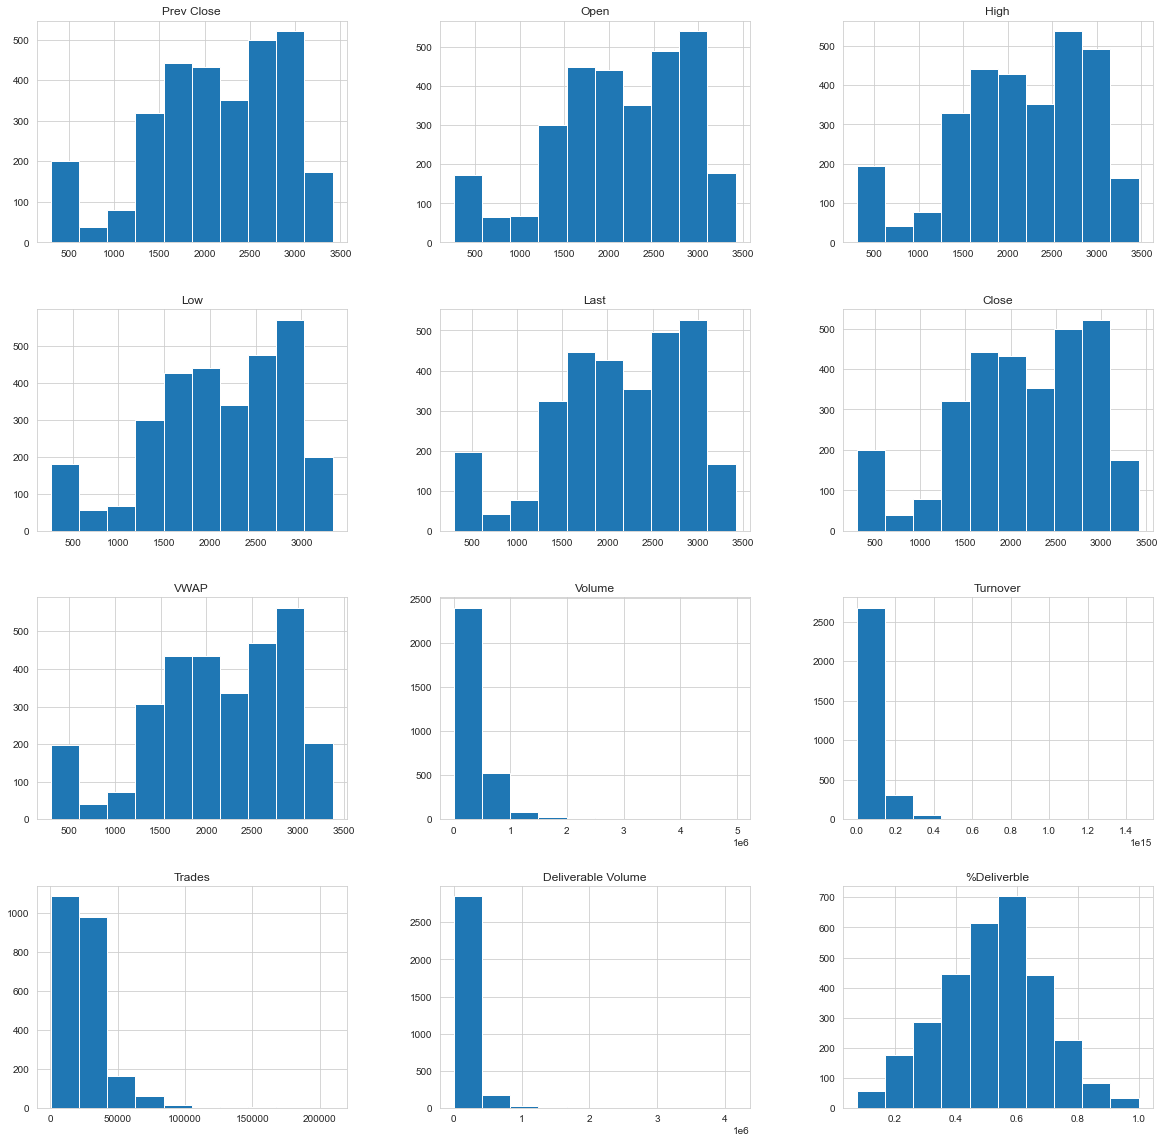

In [9]:
#plot histogram of each parameter
stock.hist(figsize=(20,20))
plt.show()

<AxesSubplot:>

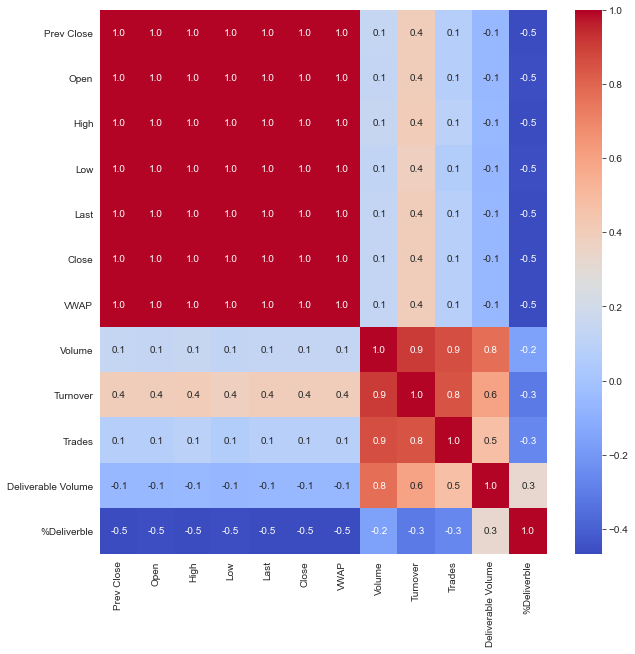

In [10]:
# Correlation heatmap
plt.figure(figsize = (10,10))
sns.heatmap(stock.corr(), annot = True, cmap = 'coolwarm', fmt = '.1f')

Prev Close  Open  High   Low  Last  Close  VWAP  Volume  \
Prev Close                1.00  1.00  1.00  1.00  1.00   1.00  1.00    0.14   
Open                      1.00  1.00  1.00  1.00  1.00   1.00  1.00    0.14   
High                      1.00  1.00  1.00  1.00  1.00   1.00  1.00    0.15   
Low                       1.00  1.00  1.00  1.00  1.00   1.00  1.00    0.13   
Last                      1.00  1.00  1.00  1.00  1.00   1.00  1.00    0.14   
Close                     1.00  1.00  1.00  1.00  1.00   1.00  1.00    0.14   
VWAP                      1.00  1.00  1.00  1.00  1.00   1.00  1.00    0.14   
Volume                    0.14  0.14  0.15  0.13  0.14   0.14  0.14    1.00   
Turnover                  0.39  0.39  0.40  0.39  0.39   0.39  0.40    0.91   
Trades                    0.08  0.08  0.10  0.06  0.08   0.08  0.08    0.87   
Deliverable Volume       -0.05 -0.06 -0.05 -0.06 -0.06  -0.06 -0.06    0.78   
%Deliverble              -0.46 -0.46 -0.47 -0.46 -0.46  -0.46 -0.46   -0.16   

                    Turnover  Trades  Deliverable Volume  %Deliverble  
Prev Close              0.39    0.08               -0.05        -0.46  
Open                    0.39    0.08               -0.06        -0.46  
High                    0.40    0.10               -0.05        -0.47  
Low                     0.39    0.06               -0.06        -0.46  
Last                    0.39    0.08               -0.06        -0.46  
Close                   0.39    0.08               -0.06        -0.46  
VWAP                    0.40    0.08               -0.06        -0.46  
Volume                  0.91    0.87                0.78        -0.16  
Turnover                1.00    0.85                0.60        -0.31  
Trades                  0.85    1.00                0.47        -0.26  
Deliverable Volume      0.60    0.47                1.00         0.33  
%Deliverble            -0.31   -0.26                0.33         1.00

<AxesSubplot:>

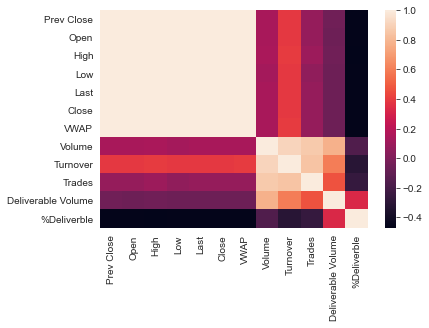

In [11]:
corr_matrix = stock.corr(method = 'pearson', min_periods =1).round(2)
display(corr_matrix)
sns.heatmap(corr_matrix)

In [12]:
stock.Date = pd.to_datetime(stock.Date, format="%Y-%m-%d")
stock["month"] = stock.Date.dt.month
stock["week"] = stock.Date.dt.week
stock["day"] = stock.Date.dt.day
stock["day_of_week"] = stock.Date.dt.dayofweek
stock.fillna(stock.mean(), inplace=True)

stock.set_index("Date", drop=False, inplace=True)
stock.head()

Date      Symbol Series  Prev Close    Open   High     Low  \
Date                                                                          
2008-05-26 2008-05-26  BAJAJ-AUTO     EQ     2101.05  898.00  898.0  551.35   
2008-05-27 2008-05-27  BAJAJ-AUTO     EQ      604.75  624.70  639.0  580.30   
2008-05-28 2008-05-28  BAJAJ-AUTO     EQ      593.15  561.65  621.9  561.65   
2008-05-29 2008-05-29  BAJAJ-AUTO     EQ      608.15  619.40  619.4  576.00   
2008-05-30 2008-05-30  BAJAJ-AUTO     EQ      599.45  605.40  607.0  538.00   

              Last   Close    VWAP   Volume      Turnover        Trades  \
Date                                                                      
2008-05-26  600.25  604.75  624.61  3972485  2.481245e+14  25956.347168   
2008-05-27  595.50  593.15  606.43  1751063  1.061901e+14  25956.347168   
2008-05-28  605.10  608.15  608.75  1652355  1.005877e+14  25956.347168   
2008-05-29  600.00  599.45  600.98   669269  4.022165e+13  25956.347168   
2008-05-30  576.25  571.70  565.55  1262117  7.137937e+13  25956.347168   

            Deliverable Volume  %Deliverble  month  week  day  day_of_week  
Date                                                                        
2008-05-26             1202933       0.3028      5    22   26            0  
2008-05-27              369389       0.2110      5    22   27            1  
2008-05-28              898602       0.5438      5    22   28            2  
2008-05-29              449951       0.6723      5    22   29            3  
2008-05-30              936432       0.7420      5    22   30            4

In [13]:
bars = alt.Chart(stock).mark_trail(color='orange').encode(
    x = 'Date:T',
    y = 'VWAP:Q',
).properties(
    title={
    "text":['Volume Weighted Average Price (VWAP)'],
    "subtitle":['There is a continuos increase in the VWAP price till 2018 and a certain dip in 2019'],
    "fontSize":15,
    "fontWeight": 'bold',
    "font":'Courier New',
    }
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   

(bars + text).properties( height=300, width=600)

alt.LayerChart(...)

In [14]:
vwap_df = stock[['VWAP']]
start_date = datetime(2017,1,1)
end_date = datetime(2018,12,1)
temp = vwap_df[(start_date <=vwap_df.index) & (end_date <=vwap_df.index)].reset_index()
bars = alt.Chart(temp).mark_trail(color='orange').encode(
    x = 'Date:T',
    y = 'VWAP:Q',
).properties(
    title={
    "text":['Trend of VWAP in 2019  '],
    "subtitle":['There is a continuos increase in the VWAP price in 2019'],
    "fontSize":15,
    "fontWeight": 'bold',
    "font":'Courier New',
    }
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   

(bars + text).properties( height=300, width=600)

alt.LayerChart(...)

In [15]:
# set base for creat custom legend and plots
base = alt.Chart(stock).transform_calculate(
legend1="'Close prices of stocks'",
legend2="'Open price of stock'",

)
scale = alt.Scale(domain=["Close prices of stocks", "Open price of stock"], range=['blue', 'violet', ])

# timeseries plot of close prices of stocks in blue colour
line1 = base.mark_line(color='blue').encode(
x = 'Date:T',
y = 'Close:Q',
color=alt.Color('legend1:N', scale=scale, title=''),
)

# timeseries plot of open prices of stocks in blue colour
line2 = base.mark_line(color='violet').encode(
x = 'Date:T',
y = 'Open:Q',
color=alt.Color('legend2:N', scale=scale, title='')
)

text = line1.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   


(line1 + line2 + text).properties(
   title={"text":['Timeseries Plot of Close and Open Price of Stock Over Year'],
           "fontSize":15,
           "fontWeight": 'bold',
           "font":'Courier New',},
    height=500, width=600
).interactive()

alt.LayerChart(...)

In [16]:
# set base for creat custom legend and plots
base = alt.Chart(stock).transform_calculate(
legend1="'High prices of stocks'",
legend2="'Low price of stock'",

)
scale = alt.Scale(domain=["High prices of stocks", "Low price of stock"], range=['red', 'green', ])

# timeseries plot of High prices of stocks red colour
line1 = base.mark_line(color='red').encode(
x = 'Date:T',
y = 'High:Q',
color=alt.Color('legend1:N', scale=scale, title=''),
)

# timeseries between low prices of stocks green colour

line2 = base.mark_line(color='green').encode(
x = 'Date:T',
y = 'Low:Q',
color=alt.Color('legend2:N', scale=scale, title='')
)

text = line1.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   


(line1 + line2 + text).properties(
    title= {"text":['Timeseries Plot of High and Price of Stock Over Year'],
                   "fontSize":15,
                   "fontWeight": 'bold',
                   "font":'Courier New',},
    height=500, width=600
).interactive()

alt.LayerChart(...)

In [17]:
#dataframe Moving Average for weeks 4, 16, 28, 40, 52 

df_ma = pd.DataFrame()
# Grouping the data week by week by taking its average.So there will be total 52 rows in the final list
df_ma['Close'] = stock['Close'].resample('W').mean()

# calculating moving averge
df_ma['weeks_4'] = df_ma['Close'].rolling(window = 4, min_periods = 1).mean()
df_ma['weeks_16'] = df_ma['Close'].rolling(window = 16, min_periods = 1).mean()
df_ma['weeks_28'] = df_ma['Close'].rolling(window = 28, min_periods = 1).mean()
df_ma['weeks_40'] = df_ma['Close'].rolling(window = 40, min_periods = 1).mean()
df_ma['weeks_52'] = df_ma['Close'].rolling(window = 52, min_periods = 1).mean()

df_ma

Close      weeks_4     weeks_16     weeks_28     weeks_40  \
Date                                                                          
2008-06-01   595.440000   595.440000   595.440000   595.440000   595.440000   
2008-06-08   568.760000   582.100000   582.100000   582.100000   582.100000   
2008-06-15   531.010000   565.070000   565.070000   565.070000   565.070000   
2008-06-22   508.490000   550.925000   550.925000   550.925000   550.925000   
2008-06-29   484.300000   523.140000   537.600000   537.600000   537.600000   
...                 ...          ...          ...          ...          ...   
2020-09-06  2917.110000  3008.685000  2875.254687  2681.157976  2822.623188   
2020-09-13  2908.230000  2984.255000  2897.786562  2680.015476  2814.732188   
2020-09-20  3000.630000  2965.897500  2921.952500  2689.790476  2808.642688   
2020-09-27  2969.600000  2948.892500  2933.410625  2707.803869  2802.606188   
2020-10-04  2914.983333  2948.360833  2942.970833  2731.996845  2794.741708   

               weeks_52  
Date                     
2008-06-01   595.440000  
2008-06-08   582.100000  
2008-06-15   565.070000  
2008-06-22   550.925000  
2008-06-29   537.600000  
...                 ...  
2020-09-06  2876.435625  
2020-09-13  2877.283317  
2020-09-20  2880.784856  
2020-09-27  2880.884471  
2020-10-04  2881.108910  

[645 rows x 6 columns]

In [18]:
# set base for creat custom legend and plots
base = alt.Chart(df_ma.reset_index()).transform_calculate(
legend1="'Close price'",
legend2="'MA of weeks 4'",
legend3="'MA of weeks 16'",
legend4="'MA of weeks 28'",
legend5="'MA of weeks 40'",
legend6="'MA of weeks 52'"
)
scale = alt.Scale(domain=["Close price", 
                          "MA of weeks 4",
                          "MA of weeks 16",
                          "MA of weeks 28",
                          "MA of weeks 40",
                          "MA of weeks 52"], 
                  range=['blue', 
                         'gold', 
                         'darkgreen', 
                         'slategray', 
                         'deeppink',
                         'firebrick'])

line1 = base.mark_line(color='blue').encode(
x = 'Date:T',
y = 'Close:Q',
color=alt.Color('legend1:N', scale=scale, title=''),
)

line2 = base.mark_line(color='gold').encode(
x = 'Date:T',
y = 'weeks_4:Q',
color=alt.Color('legend2:N', scale=scale, title='')
)

line3 = base.mark_line(color='darkgreen').encode(
x = 'Date:T',
y = 'weeks_16:Q',
color=alt.Color('legend3:N', scale=scale, title='')
)

line4 = base.mark_line(color='slategray').encode(
x = 'Date:T',
y = 'weeks_28:Q',
color=alt.Color('legend4:N', scale=scale, title='')
)

line5 = base.mark_line(color='deeppink').encode(
x = 'Date:T',
y = 'weeks_40:Q',
color=alt.Color('legend5:N', scale=scale, title='')
)

line6 = base.mark_line(color='firebrick').encode(
x = 'Date:T',
y = 'weeks_52:Q',
color=alt.Color('legend6:N', scale=scale, title='')
)

text = line1.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   


(line1 + line2 + line3 + line4 + line5 + line6 +text).properties(
    title={"text":['Moving Average Plot of Stock Over the Weeks'],
           "fontSize":15,
           "fontWeight": 'bold',
           "font":'Courier New',},
    height=500, width=600
).interactive()

alt.LayerChart(...)

In [19]:
# we will here use resample.Resampler.asfreq() function. Because it also provide us option of padding (backwardfill/forwardfill missing values "not NANs" ). 
# source: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.asfreq.html We are using this, because on saturdays and sundays, market remains closed, so friday's close price could be forwarded in closing days.
stock_day = stock.asfreq('D', method ='pad')

df_rw = pd.DataFrame()
df_rw['Close'] = stock['Close']
df_rw['day_10'] = df_rw['Close'].rolling(window = 10, min_periods = 1).mean()
df_rw['day_50'] = df_rw['Close'].rolling(window = 50, min_periods = 1).mean()
df_rw

Close       day_10       day_50
Date                                         
2008-05-26   604.75   604.750000   604.750000
2008-05-27   593.15   598.950000   598.950000
2008-05-28   608.15   602.016667   602.016667
2008-05-29   599.45   601.375000   601.375000
2008-05-30   571.70   595.440000   595.440000
...             ...          ...          ...
2020-09-24  2931.85  2981.010000  2995.928000
2020-09-25  2957.40  2985.115000  2995.176000
2020-09-28  2966.35  2985.980000  2994.452000
2020-09-29  2897.50  2981.995000  2992.316000
2020-09-30  2881.10  2966.310000  2990.230000

[3059 rows x 3 columns]

In [20]:
# set base for creat custom legend and plots
base = alt.Chart(df_ma.reset_index()).transform_calculate(
legend1="'Close price'",
legend2="'MA of day 10'",
legend3="'MA of day 50'",

)
scale = alt.Scale(domain=["Close price", 
                          "MA of day 10",
                          "MA of day 50",], 
                  range=['blue',   
                         'pink', 
                         'firebrick'])

line1 = base.mark_line(color='blue').encode(
x = 'Date:T',
y = 'Close:Q',
color=alt.Color('legend1:N', scale=scale, title=''),
)

line2 = base.mark_line(color='pink').encode(
x = 'Date:T',
y = 'weeks_4:Q',
color=alt.Color('legend2:N', scale=scale, title='')
)


line3 = base.mark_line(color='firebrick').encode(
x = 'Date:T',
y = 'weeks_16:Q',
color=alt.Color('legend3:N', scale=scale, title='')
)


text = line1.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   


(line1 + line2 + line3  +text).properties(
    title={"text":['Moving Average Plot of Stock Over the Days'],
           "fontSize":15,
           "fontWeight": 'bold',
           "font":'Courier New',},
    height=500, width=600
).interactive()

alt.LayerChart(...)

In [21]:
from statsmodels.tsa.stattools import acf, pacf
# data for partial autocorrelation plot
lags = 50
source = pd.DataFrame({
    'lags': list(range(lags+1)),
    'PACF': pacf(stock["Close"], nlags=lags)
})

# ploting partial autocorrelation plot https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html )
bar = alt.Chart(source).mark_bar().encode(
    x='lags:Q',
    y='PACF:Q',

)
circle = alt.Chart(source).mark_circle(size = 50, color='red').encode(
    x='lags:Q',
    y='PACF:Q',

)
text = bar.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)  

(bar + circle + text).properties(
    title={"text":['Partial AutoCorrelation Plot With 50 Lags of Stocks'],
                   "fontSize":15,
                   "fontWeight": 'bold',
                   "font":'Courier New',},
    height=500, width=600
)

alt.LayerChart(...)

In [22]:
df_train = stock[stock.Date < "2020"]
df_valid = stock[stock.Date >= "2020"]

from fbprophet import Prophet
model = Prophet()
model.fit(df_train[["Date", "VWAP"]].rename(columns={"Date": "ds", "VWAP": "y"}))

forecast = model.predict(df_valid[["Date", "VWAP"]].rename(columns={"Date": "ds", "VWAP": "y"}))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


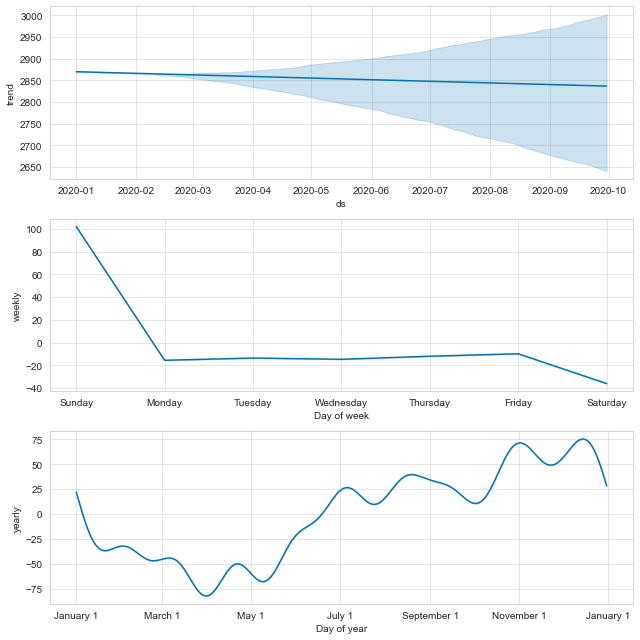

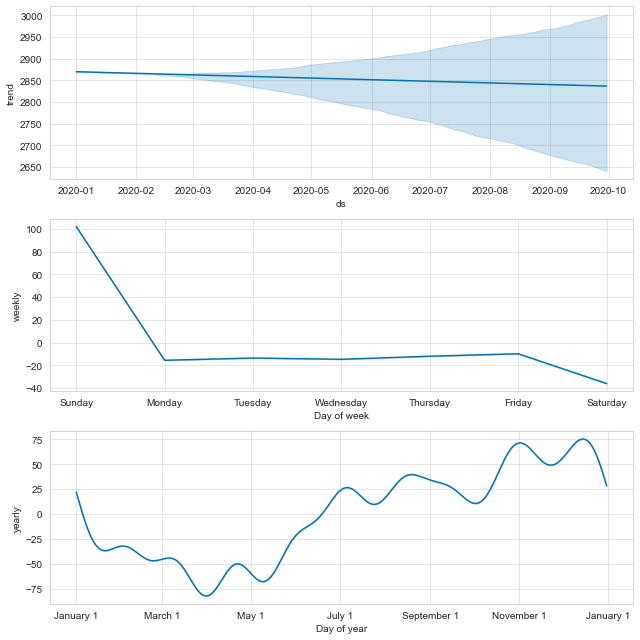

In [23]:
model.plot_components(forecast)

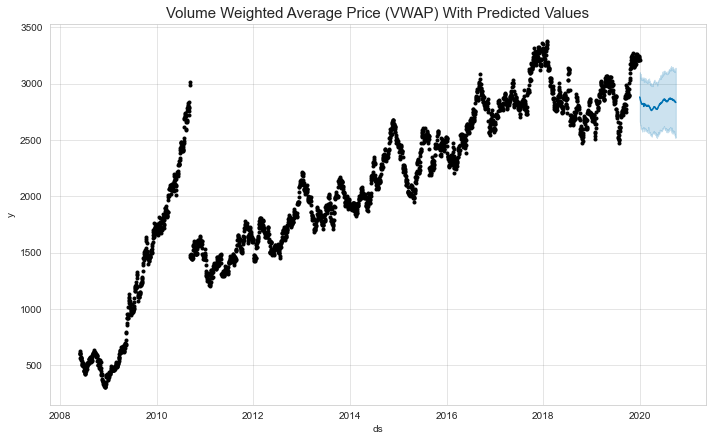

In [24]:
model.plot(forecast)
plt.title('Volume Weighted Average Price (VWAP) With Predicted Values', fontsize=15)
plt.show()

In [25]:
# train/test split
def train_data(data):
    x = data['Close']
    X_train = []
    y_train = []
    for i in range(60, 2870):
        X_train.append(x[i-60:i])
        y_train.append(x[i])
    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train

def test_data(data):
    x = data['Close'][len(data['Close'])-182:]
    X_test = []
    y_test = []
    for i in range(60, 182):
        X_test.append(x[i-60:i])
        y_test.append(x[i])
    X_test, y_test = np.array(X_test), np.array(y_test)
    return X_test, y_test

In [26]:
# performing 
X_train, y_train = train_data(stock_day)

X_test, y_test = test_data(stock_day)

# shape of the input and output
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2810, 60), (2810,), (122, 60), (122,))

In [27]:
# train test split plot
train_line = alt.Chart(stock[stock.Date < "2020"]['Close'].reset_index()).mark_line(color='blue').encode(
x = 'Date:T',
y = 'Close:Q',
)

test_line = alt.Chart(stock[stock.Date >= "2020"]['Close'].reset_index()).mark_line(color='orange').encode(
x = 'Date:T',
y = 'Close:Q',
)

(train_line + test_line ).properties(
        title='TRAIN/TEST SPLIT',
        height=200, width=600
    ) 

alt.LayerChart(...)

In [28]:
import xgboost
from hyperopt import hp
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

xgb = xgboost.XGBRegressor(objective ='reg:squarederror', random_state = 101, tree_method='gpu_hist')

In [29]:
# Traing and  Evaluate model on train/test set
xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)
mae = np.round(mean_absolute_error(prediction, y_test), 5)
mse = np.round(mean_squared_error(prediction, y_test), 5)
print(' ')
print('Mean Absolute Error :',mae)
print('Mean Absolute Error :',mse)

 
Mean Absolute Error : 828.91404
Mean Absolute Error : 861232.91532


In [30]:
# kfold split
kfold = KFold(n_splits=10, shuffle=True)
val_score = cross_val_score(xgb, X_train, y_train, cv=kfold, scoring = 'neg_mean_absolute_error')
val_score = (-1 * val_score)
val_score = np.round(val_score.mean(), 5)
print('CV Mean Absolute Error :', val_score)

CV Mean Absolute Error : 19.01258


In [31]:
# Create a function to tune hyperparameters of the selected models.
def tune_hyperparameters(model, params, X_train, y_train):
    global best_params, best_score #if you want to know best parametes and best score
## Construct grid search object with 3 fold cross validation
    kfold = KFold(n_splits=5, shuffle=True)
    regcv = RandomizedSearchCV(estimator=xgb_opt, 
                               param_distributions=params, 
                               cv = kfold, 
                               verbose = 1, 
                               scoring = 'neg_mean_absolute_error')
    regcv.fit(X_train, y_train)
    best_params = regcv.best_params_ 
    best_score = np.round((-1 * regcv.best_score_), 5)
    return best_params, best_score

In [32]:
# Define hyperparameters of Xgboost
params = {
        'n_components': randint(1000, 2000),
        "learning_rate": uniform(0.01, 0.06),
        'max_depth': [5, 10, 15, 20],
        'min_child_weight': [1, 5, 10, 15],
        'subsample': [0.7, 0.05, 0.1],
        'gamma': [0.1, 0.5, 0.05],
        'colsample_bytree': [0.1, 0.7, 0.05],
        'alpha' : [0.5, 1, 5],
        'lambda': [0.1, 1, 3],
}

# Define the model 
xgb_opt = xgboost.XGBRegressor(objective ='reg:squarederror', random_state = 101, tree_method='gpu_hist')

# Turning for data
tune_hyperparameters(xgb_opt, params, X_train, y_train)
best_params, best_score = best_params, best_score
print('best params:{} & best_mae_score:{:0.5f}' .format(best_params, best_score))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.0min finished


best params:{'alpha': 5, 'colsample_bytree': 0.1, 'gamma': 0.1, 'lambda': 0.1, 'learning_rate': 0.04386360865041577, 'max_depth': 20, 'min_child_weight': 1, 'n_components': 1038, 'subsample': 0.7} & best_mae_score:33.29865


In [33]:
# Prepare the data for predicting the Close Value on 20-10-2020.

jul_x = stock_day['Close'][len(stock_day['Close'])-60:]
jul_X_test = []
jul_X_test.append(jul_x[0:])
jul_X_test = np.array(jul_X_test)
jul_X_test

array([[3004.95, 2917.45, 2969.95, 3009.  , 2991.8 , 3001.7 , 3001.7 ,
        3001.7 , 2993.8 , 3007.45, 3023.  , 3017.95, 2987.55, 2987.55,
        2987.55, 3115.6 , 3104.8 , 3059.8 , 3036.95, 3053.15, 3053.15,
        3053.15, 3039.35, 3009.4 , 3082.2 , 3043.  , 3014.15, 3014.15,
        3014.15, 2967.  , 2958.4 , 2880.55, 2896.4 , 2883.2 , 2883.2 ,
        2883.2 , 2898.2 , 2901.75, 2910.15, 2914.7 , 2916.35, 2916.35,
        2916.35, 2957.7 , 2937.35, 3037.95, 3019.2 , 3050.95, 3050.95,
        3050.95, 2986.7 , 2985.85, 2986.2 , 2931.85, 2957.4 , 2957.4 ,
        2957.4 , 2966.35, 2897.5 , 2881.1 ]])

In [34]:
# fitting and preding on optimize param
xgb_opt = xgboost.XGBRegressor(**best_params)

xgb_opt.fit(X_train, y_train)
# predicting the Closing Values for the Last 6 month of 2020
pred = xgb_opt.predict(X_test)
# predicting the closing price of 20 Oct 2020
jul_pred = xgb_opt.predict(jul_X_test)
print('')
print('Prediction of close value of Bajaj Auto for 20th Oct 2020:', prediction)

[22:30:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Prediction of close value of Bajaj Auto for 20th Oct 2020: [2694.753  2728.6033 2710.6965 2737.796  2729.215  2734.2363 2743.0017
 2745.4895 2731.17   2641.1523 2747.7542 2579.4783 2547.2388 2317.5195
 2357.1475 2442.9102 2519.986  2599.017  2587.2803 2705.8008 2718.0059
 2737.9805 2530.2944 2636.8257 2506.9595 2513.0283 2515.9492 2215.1394
 2242.3975 2457.8223 2533.3958 2466.734  2439.3298 2504.8647 2499.6233
 2505.4927 2521.401  2150.8457 2100.513  2062.7673 1871.4237 1871.4237
 1871.4237 1871.4237 1871.4237 1871.1888 1868.7623 1749.3187 1749.3187
 1709.6661 1813.6512 1819.3553 1819.3553 2234.165  2261.2126 2261.2126
 2272.601  2272.601  1864.6924 1864.6924 1902.4382 1902.4382 1902.4382
 1864.6924 1868.8142 1868.8142 1868.8142 1864.6924 1864.6924 1864.6924
 1864.6924 1864.6924 1864.6924 1864.6924 1864.6924 1864.6924 1864.

In [35]:
pred.shape

(122,)

In [36]:
stock_day['Close'][len(stock_day['Close'])-122:].shape

(122,)

In [37]:
# Creating dataframe of y_test, prediction values Last 30 Days of 2015, and prediction values 1st jan 2016 ,

test_pred_df = stock_day['Close'][len(stock_day['Close'])-122:].reset_index()

# prediction value
test_pred_df['prediction'] = pred

# prediction value of 1 jan 2016
new_row = {'Date': pd.to_datetime('2020-10-18'), 'jul_pred': jul_pred}
test_pred_df = test_pred_df.append(new_row, ignore_index=True)

In [38]:
base = alt.Chart(test_pred_df).transform_calculate(
legend1="'Actual price of last 6 months'",
legend2="'Predicted price of last 6 months'",
legend3="'20 Oct 2020 Close price Prediction'"
)
scale = alt.Scale(domain=['Actual price of last 6 months', 'Predicted price of last 6 months', '20 Oct 2020 Close price Prediction'], range=['blue', 'red', 'black'], zero=False)

# timeseries plot of close prices of stocks/indices in blue colour
line1 = base.mark_line(color='blue').encode(
x = 'Date:T',
y = 'Close:Q',
color=alt.Color('legend1:N', scale=scale, title=''),
)

# timeseries between two volume shocks in a different color (Red)
# Since the difference value is too big, in order to visualize all plots properly,
# we are taking the percentage change of Volumes.
line2 = base.mark_line(color='red').encode(
x = 'Date:T',
y = 'prediction:Q',
color=alt.Color('legend2:N', scale=scale, title='')
)

circle = base.mark_point(color='black',size=50).encode(
x = 'Date:T',
y = 'jul_pred:Q',
color=alt.Color('legend3:N', scale=scale, title='')
)

(line1 + line2 + circle).properties(
    title={"text":['20 Oct Prediction'],
                   "fontSize":15,
                   "fontWeight": 'bold',
                   "font":'Courier New',},
    height=200, width=650
).interactive()

alt.LayerChart(...)